In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, RNN
from keras.preprocessing.sequence import pad_sequences
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15638000699287692387
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11297803469
locality {
  bus_id: 1
}
incarnation: 15569911474930394396
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
def createXorData(samples=100000, size=50):
  """
  generates a dataset for the XOR problem in 
    https://blog.openai.com/requests-for-research-2/
  LHS are sequences of bools
  RHS computes the parity bit 
    (eg. wether the sequence has odd or even sum)
  """
  lhs = np.zeros((samples, size), dtype=np.float32)
  rhs = np.zeros(samples)
  for row in range(samples):
    lhs[row] = np.random.randint(0, 2, size)
    rhs[row] = lhs[row].sum() % 2
  return lhs, rhs

In [0]:
SIZE = 8
SAMPLES = 60000
BATCH_SIZE = 3000

Xtrain, Ytrain = createXorData(SAMPLES, SIZE)
Xtest, Ytest = createXorData(int(SAMPLES/2), SIZE)

In [32]:
#
# sklearn MLP
#
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50),
                    activation="relu"
                   ).fit(Xtrain, Ytrain)
pred_score = mlp.score(Xtest, Ytest)
print(pred_score)

1.0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (3000, 8)                 320       
_________________________________________________________________
dense_5 (Dense)              (3000, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________
Train on 57000 samples, validate on 3000 samples
Epoch 1/300
57000/57000 [==============================] - 1s 19us/step - loss: 0.7638 - acc: 0.4984 - val_loss: 0.7026 - val_acc: 0.4947
Epoch 2/300
57000/57000 [==============================] - 0s 9us/step - loss: 0.6952 - acc: 0.5037 - val_loss: 0.6938 - val_acc: 0.5053
Epoch 3/300
57000/57000 [==============================] - 1s 9us/step - loss: 0.6939 - acc: 0.5023 - val_loss: 0.6932 - val_acc: 0.5053
Epoch 4/300
57000/57000 [==============================] - 1s 9us/step - loss: 

57000/57000 [==============================] - 0s 8us/step - loss: 0.6955 - acc: 0.5011 - val_loss: 0.6997 - val_acc: 0.4947
Epoch 9/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6949 - acc: 0.4993 - val_loss: 0.6944 - val_acc: 0.4947
Epoch 10/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.5008 - val_loss: 0.6940 - val_acc: 0.4947
Epoch 11/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6944 - acc: 0.4993 - val_loss: 0.6954 - val_acc: 0.5053
Epoch 12/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.5005 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 13/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.4991 - val_loss: 0.6933 - val_acc: 0.5053
Epoch 14/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6950 - acc: 0.4982 - val_loss: 0.6949 - val_acc: 0.5053
Epoch 15/300
57000/57000 [======================

57000/57000 [==============================] - 0s 8us/step - loss: 0.6955 - acc: 0.4979 - val_loss: 0.6951 - val_acc: 0.4947
Epoch 22/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.5004 - val_loss: 0.6949 - val_acc: 0.4947
Epoch 23/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6946 - acc: 0.5029 - val_loss: 0.6946 - val_acc: 0.5053
Epoch 24/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6943 - acc: 0.4993 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 25/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.5047 - val_loss: 0.6933 - val_acc: 0.5053
Epoch 26/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.4994 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 27/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6967 - acc: 0.4952 - val_loss: 0.6967 - val_acc: 0.5053
Epoch 28/300
57000/57000 [=====================

57000/57000 [==============================] - 0s 8us/step - loss: 0.6970 - acc: 0.5006 - val_loss: 0.6935 - val_acc: 0.5053
Epoch 35/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6944 - acc: 0.5004 - val_loss: 0.6932 - val_acc: 0.5053
Epoch 36/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.5055 - val_loss: 0.6959 - val_acc: 0.4947
Epoch 37/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.4993 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 38/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6960 - acc: 0.5017 - val_loss: 0.7026 - val_acc: 0.5053
Epoch 39/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6949 - acc: 0.5006 - val_loss: 0.6935 - val_acc: 0.5053
Epoch 40/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.4978 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 41/300
57000/57000 [=====================

57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.5019 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 48/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6943 - acc: 0.4998 - val_loss: 0.6945 - val_acc: 0.5053
Epoch 49/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6958 - acc: 0.5000 - val_loss: 0.6958 - val_acc: 0.4947
Epoch 50/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6940 - acc: 0.5001 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 51/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6943 - acc: 0.4974 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 52/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6942 - acc: 0.5007 - val_loss: 0.6934 - val_acc: 0.5053
Epoch 53/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.5000 - val_loss: 0.6954 - val_acc: 0.4947
Epoch 54/300
57000/57000 [=====================

57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.4999 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 61/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6932 - acc: 0.5024 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 62/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.4991 - val_loss: 0.6963 - val_acc: 0.5053
Epoch 63/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6944 - acc: 0.5006 - val_loss: 0.6947 - val_acc: 0.4947
Epoch 64/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.4988 - val_loss: 0.6933 - val_acc: 0.5053
Epoch 65/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6941 - acc: 0.5009 - val_loss: 0.6944 - val_acc: 0.4947
Epoch 66/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.5000 - val_loss: 0.6936 - val_acc: 0.4947
Epoch 67/300
57000/57000 [=====================

57000/57000 [==============================] - 0s 8us/step - loss: 0.6941 - acc: 0.5008 - val_loss: 0.6942 - val_acc: 0.4947
Epoch 74/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6942 - acc: 0.4991 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 75/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6956 - acc: 0.5021 - val_loss: 0.6971 - val_acc: 0.5053
Epoch 76/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6987 - acc: 0.5031 - val_loss: 0.6940 - val_acc: 0.4947
Epoch 77/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.5002 - val_loss: 0.6936 - val_acc: 0.4947
Epoch 78/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.5011 - val_loss: 0.6935 - val_acc: 0.4947
Epoch 79/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.5018 - val_loss: 0.6936 - val_acc: 0.5053
Epoch 80/300
57000/57000 [=====================

57000/57000 [==============================] - 0s 8us/step - loss: 0.6956 - acc: 0.4999 - val_loss: 0.6974 - val_acc: 0.4947
Epoch 87/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.5013 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 88/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6956 - acc: 0.5031 - val_loss: 0.6942 - val_acc: 0.4947
Epoch 89/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6946 - acc: 0.5009 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 90/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6944 - acc: 0.5008 - val_loss: 0.6933 - val_acc: 0.5053
Epoch 91/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.5034 - val_loss: 0.6932 - val_acc: 0.5053
Epoch 92/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6947 - acc: 0.4982 - val_loss: 0.6936 - val_acc: 0.4947
Epoch 93/300
57000/57000 [=====================

57000/57000 [==============================] - 0s 8us/step - loss: 0.6940 - acc: 0.4964 - val_loss: 0.6937 - val_acc: 0.5053
Epoch 100/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 101/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6949 - acc: 0.5003 - val_loss: 0.6954 - val_acc: 0.4947
Epoch 102/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6947 - acc: 0.5005 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 103/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6946 - acc: 0.5025 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 104/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6941 - acc: 0.5014 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 105/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.4978 - val_loss: 0.6949 - val_acc: 0.4947
Epoch 106/300
57000/57000 [==============

57000/57000 [==============================] - 0s 8us/step - loss: 0.6955 - acc: 0.5004 - val_loss: 0.6989 - val_acc: 0.5053
Epoch 113/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6956 - acc: 0.5002 - val_loss: 0.6942 - val_acc: 0.5053
Epoch 114/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.4982 - val_loss: 0.6935 - val_acc: 0.5053
Epoch 115/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6946 - acc: 0.5026 - val_loss: 0.6935 - val_acc: 0.5053
Epoch 116/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6946 - acc: 0.5018 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 117/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6945 - acc: 0.5016 - val_loss: 0.6948 - val_acc: 0.4947
Epoch 118/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.4982 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 119/300
57000/57000 [==============

57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.4997 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 126/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.5007 - val_loss: 0.6938 - val_acc: 0.4947
Epoch 127/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.5005 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 128/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6940 - acc: 0.4989 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 129/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.5016 - val_loss: 0.6934 - val_acc: 0.4947
Epoch 130/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.4990 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 131/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.4986 - val_loss: 0.6946 - val_acc: 0.5053
Epoch 132/300
57000/57000 [==============

57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.4972 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 139/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6948 - acc: 0.5006 - val_loss: 0.6935 - val_acc: 0.5053
Epoch 140/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.5012 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 141/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.4972 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 142/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.4998 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 143/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.4992 - val_loss: 0.6946 - val_acc: 0.4947
Epoch 144/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6944 - acc: 0.5022 - val_loss: 0.6932 - val_acc: 0.5053
Epoch 145/300
57000/57000 [==============

57000/57000 [==============================] - 0s 8us/step - loss: 0.6946 - acc: 0.5012 - val_loss: 0.6937 - val_acc: 0.5053
Epoch 152/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6949 - acc: 0.5007 - val_loss: 0.6944 - val_acc: 0.5053
Epoch 153/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.5016 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 154/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.5023 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 155/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.5019 - val_loss: 0.6944 - val_acc: 0.5053
Epoch 156/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.5009 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 157/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.4970 - val_loss: 0.6945 - val_acc: 0.5053
Epoch 158/300
57000/57000 [==============

Epoch 165/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6959 - acc: 0.4995 - val_loss: 0.6953 - val_acc: 0.4947
Epoch 166/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 167/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 168/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.5001 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 169/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.4966 - val_loss: 0.6935 - val_acc: 0.4947
Epoch 170/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.5022 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 171/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.4974 - val_loss: 0.6936 - val_acc: 0.4947
Epoch 172/300
57000/57000 [

57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.4991 - val_loss: 0.6944 - val_acc: 0.4947
Epoch 179/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.5015 - val_loss: 0.6934 - val_acc: 0.5053
Epoch 180/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.5023 - val_loss: 0.6945 - val_acc: 0.4947
Epoch 181/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.5051 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 182/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.5015 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 183/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6951 - acc: 0.5029 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 184/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6948 - acc: 0.5025 - val_loss: 0.6939 - val_acc: 0.4947
Epoch 185/300
57000/57000 [==============

57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.5004 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 192/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6932 - acc: 0.5011 - val_loss: 0.6932 - val_acc: 0.5053
Epoch 193/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.5006 - val_loss: 0.6935 - val_acc: 0.4947
Epoch 194/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.4994 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 195/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.5008 - val_loss: 0.6947 - val_acc: 0.5053
Epoch 196/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6943 - acc: 0.5025 - val_loss: 0.6953 - val_acc: 0.4947
Epoch 197/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.4991 - val_loss: 0.6940 - val_acc: 0.4947
Epoch 198/300
57000/57000 [==============

57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.5037 - val_loss: 0.6934 - val_acc: 0.4947
Epoch 205/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6940 - acc: 0.5007 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 206/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.5004 - val_loss: 0.6936 - val_acc: 0.4947
Epoch 207/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.4991 - val_loss: 0.6941 - val_acc: 0.4947
Epoch 208/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.5007 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 209/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.4998 - val_loss: 0.6933 - val_acc: 0.5053
Epoch 210/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.4962 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 211/300
57000/57000 [==============

Epoch 218/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.4985 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 219/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.4985 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 220/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.5006 - val_loss: 0.6937 - val_acc: 0.4947
Epoch 221/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.4995 - val_loss: 0.6933 - val_acc: 0.5053
Epoch 222/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.5031 - val_loss: 0.6942 - val_acc: 0.4947
Epoch 223/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6952 - acc: 0.4971 - val_loss: 0.6940 - val_acc: 0.5053
Epoch 224/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6941 - acc: 0.4989 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 225/300
57000/57000 [

57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.5021 - val_loss: 0.6938 - val_acc: 0.4947
Epoch 232/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6941 - acc: 0.5022 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 233/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6942 - acc: 0.4998 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 234/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.5012 - val_loss: 0.6937 - val_acc: 0.4947
Epoch 235/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.4997 - val_loss: 0.6934 - val_acc: 0.5053
Epoch 236/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6941 - acc: 0.5004 - val_loss: 0.6952 - val_acc: 0.4947
Epoch 237/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.4995 - val_loss: 0.6936 - val_acc: 0.5053
Epoch 238/300
57000/57000 [==============

57000/57000 [==============================] - 0s 8us/step - loss: 0.6943 - acc: 0.5014 - val_loss: 0.6951 - val_acc: 0.4947
Epoch 245/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.5014 - val_loss: 0.6950 - val_acc: 0.5053
Epoch 246/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.4992 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 247/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.5006 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 248/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.4999 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 249/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.4988 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 250/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.4994 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 251/300
57000/57000 [==============

57000/57000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.5015 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 258/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.4987 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 259/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6935 - acc: 0.4979 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 260/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.5034 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 261/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6942 - acc: 0.4988 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 262/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.4972 - val_loss: 0.6935 - val_acc: 0.4947
Epoch 263/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.4999 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 264/300
57000/57000 [==============

57000/57000 [==============================] - 0s 8us/step - loss: 0.6940 - acc: 0.4956 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 271/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.5048 - val_loss: 0.6946 - val_acc: 0.5053
Epoch 272/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6950 - acc: 0.5010 - val_loss: 0.6941 - val_acc: 0.4947
Epoch 273/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6961 - acc: 0.5006 - val_loss: 0.6959 - val_acc: 0.4947
Epoch 274/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6944 - acc: 0.5038 - val_loss: 0.6940 - val_acc: 0.5053
Epoch 275/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6939 - acc: 0.5043 - val_loss: 0.6935 - val_acc: 0.5053
Epoch 276/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.5025 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 277/300
57000/57000 [==============

57000/57000 [==============================] - 0s 8us/step - loss: 0.6945 - acc: 0.5019 - val_loss: 0.6940 - val_acc: 0.5053
Epoch 284/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6942 - acc: 0.5004 - val_loss: 0.6944 - val_acc: 0.4947
Epoch 285/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6936 - acc: 0.5029 - val_loss: 0.6934 - val_acc: 0.4947
Epoch 286/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.4982 - val_loss: 0.6937 - val_acc: 0.5053
Epoch 287/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6938 - acc: 0.4954 - val_loss: 0.6951 - val_acc: 0.4947
Epoch 288/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6937 - acc: 0.5006 - val_loss: 0.6941 - val_acc: 0.5053
Epoch 289/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6941 - acc: 0.4983 - val_loss: 0.6935 - val_acc: 0.4947
Epoch 290/300
57000/57000 [==============

57000/57000 [==============================] - 0s 8us/step - loss: 0.6934 - acc: 0.4967 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 297/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6940 - acc: 0.4992 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 298/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.5002 - val_loss: 0.6931 - val_acc: 0.5053
Epoch 299/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6933 - acc: 0.5029 - val_loss: 0.6932 - val_acc: 0.5053
Epoch 300/300
57000/57000 [==============================] - 0s 8us/step - loss: 0.6944 - acc: 0.4958 - val_loss: 0.6942 - val_acc: 0.4947


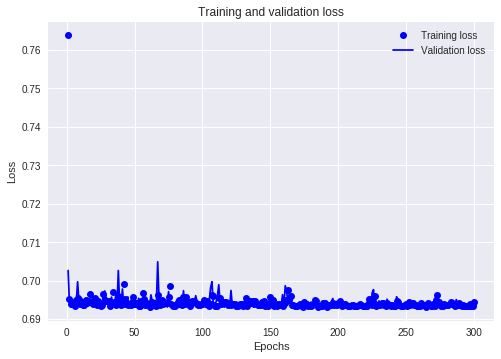

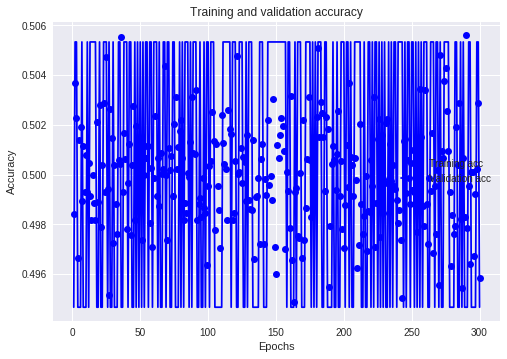

ValueError: ignored

In [8]:
"""
Training data is shaped as a normal matrix
[[0,1,1], [1,0,0], ..., [1,1,1]]

The RNN cell takes as input a sequence of sequences,
so to have a rnn sequence length of [# features] 
the data needs to be reshaped as
[[[0],[1],[1]], [[1],[0],[0]], ..., [[1],[1],[1]]]

(alternatively the data can be further split 
 in more sub-array of sequences in the features)
"""
model = Sequential()
model.add(LSTM(SIZE, batch_input_shape=(BATCH_SIZE, SIZE, 1), stateful=True))
model.add(Dense(1, activation='sigmoid'))
model_opt = optimizers.Adam(lr=0.5, beta_1=0.9, beta_2=0.999,
                            epsilon=None, decay=0.001, amsgrad=False)
model.compile(optimizer=model_opt, loss='binary_crossentropy', metrics=['acc'])

model.summary()
history = model.fit(
    # reshape training data in 
    Xtrain.reshape((len(Xtrain), SIZE, 1)),
    Ytrain, epochs=300,
    batch_size=BATCH_SIZE,
    validation_split=0.05, 
    shuffle=True, verbose=True)
#
# Plotting output
#
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
preds = model.predict(Xtest.reshape((len(Xtest), SIZE, 1)))
preds = np.round(preds[:, 0]).astype('float32')
acc = (np.sum(preds == Ytest) / len(Ytest)) * 100.
print('Accuracy: {:.2f}%'.format(acc))